In [1]:
import numpy             as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

 # PCA

### 2.9 PCA Implementation
Implement the following `PCA` class:
* `Fit` - Given $\boldsymbol{X}\in\mathbb{R}^{D\times N}$, obtains the parameters for the `Encode` and `Decode` methods.
* `Encode` - Apply (out of sample) encoding.
* `Decode` - Apply (out of sample) decoding.  

**Notes:**
* Use `scipy.sparse.linalg.svds` for efficient decomposition.
* The order of the singular values obtained by `svds` is not guaranteed.

In [5]:
from scipy.sparse import linalg 


class PCA:
    def __init__(self, d):
        self.d = d
        self.mu = None
        self.u = None
        
    def Fit(self, mX):
        '''
        Learns model's parameters
        Args:
            mX - Input training data, mX.shape = (D, N)
        Output:
            self
        '''
        ####################################################
        ##--Your code here...
        mu = np.mean(mX, axis = 1)
        mu = mu.reshape(mX.shape[0],1)
        self.mu = mu
        mX_mean = mX - mu
        u, s, vh= linalg.svds(mX_mean, k=self.d)
        top_eigen_values_Idx = np.argsort(s)
        top_eigen_values_Idx = top_eigen_values_Idx[::-1]
        u = u[:,top_eigen_values_Idx]
        self.u = u
        #################################################### 
        return self
    
    def Encode(self, mX):
        '''
        Apply (out of sample) encoding
        Args:
            mX - Input data,                                  mX.shape = (D, N)
        Output:
            mZ - Low-dimensional representation (embeddings), mZ.shape = (d, N)
        '''
        ####################################################
        ##--Your code here...
        embeddings = np.dot(self.u.T, mX - self.mu)
        return embeddings
        ####################################################
    
    def Decode(self, mZ):
        '''
        Apply (out of sample) decoding
        Args:
            mZ    - Low-dimensional representation (embeddings), mZ.shape    = (d, N)
        Output:
            mHatX - Reconstructed data,                          mHatX.shape = (D, N)
        '''
        ####################################################
        ##--Your code here...
        embeddings = np.dot(self.u, mZ) + self.mu
        return embeddings
        ####################################################
        

#### Test your implementation

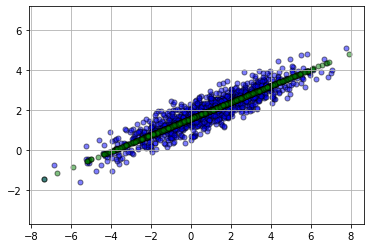

In [6]:
N = 1000
D = 2
d = 1

μ =  [1, 2]

Σ = [[5, 2],
     [2, 1]]

mX    = np.random.multivariate_normal(μ, Σ, N).T
oPCA  = PCA(d).Fit(mX)
mZ    = oPCA.Encode(mX)
mHatX = oPCA.Decode(mZ)

plt.figure ()
plt.scatter(*mX   , s=25, c='b', edgecolor='k', alpha=.5)
plt.scatter(*mHatX, s=25, c='g', edgecolor='k', alpha=.5)
plt.axis   ('equal')
plt.grid   ()
plt.show   ()

---
### 2.10
For each dataset in `[load_iris, load_wine, load_breast_cancer, load_digits]`:
1. Read about the input data:
    * How many features are in the sample? $D=?$
    * How many sample? $N=?$
    * Do all features have the same unit?
2. If the features do not have the same unit, consider normalizing the input data.  
that is, remove the sample mean and divide by the sample std:
$$\boldsymbol{x}_{i}\left[k\right]\leftarrow\frac{\boldsymbol{x}_{i}\left[k\right]-\boldsymbol{\mu}_{x}\left[k\right]}{\boldsymbol{\sigma}_{x}\left[k\right]}$$
where $\boldsymbol{\sigma}_{x}\left[k\right]$ is the standard deviation of the $k$th feature.
3. Apply PCA from $D$ to $d=2$ and obtained the low-dimensional represent $\boldsymbol{Z}\in\mathbb{R}^{2\times N}$.
4. Make a scatter plot of $\boldsymbol{Z}\in\mathbb{R}^{2\times N}$ and color the data-points according to `vY`.

You may use the pattern below:

In [8]:
# iris dataset contains 4 features, all in centimeters
#digits contains hand written digits in same units 

datasets_to_skip_standartisation = {'Digits', 'Iris'}

def are_same_unit(dataset_name):
    
    return dataset_name in datasets_to_skip_standartisation
    

def standartise(features, epsilon=1e-100):
    
    means = np.nanmean(features, axis=0)
    scale = np.nanstd(features, axis=0)
    scale[scale == 0.0] = 1.0
    
    return np.subtract(features, means)/(scale)


Dataset: Iris contains 4 samples with 150 features | Same Unit
Dataset: Wine contains 13 samples with 178 features | Diffrent Units
Dataset: Breast cancer contains 30 samples with 569 features | Diffrent Units
Dataset: Digits contains 64 samples with 1797 features | Same Unit


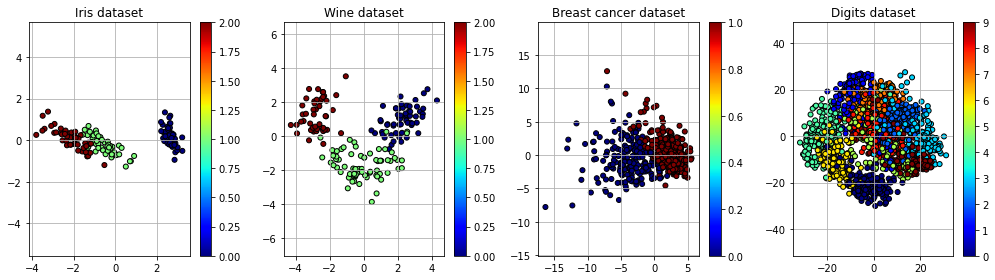

In [10]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_digits

lLoad  = [load_iris, load_wine, load_breast_cancer, load_digits]
lName  = ['Iris',    'Wine',    'Breast cancer',    'Digits'   ]
L      = len(lLoad)

fig, _ = plt.subplots(1, L, figsize=(14, 4))
for ii in range(L):
    mX, vY = lLoad[ii](return_X_y=True)
    

        
    ####################################################
    ##--Your code here...
    
    
    dataset_name = lName[ii]
    are_dataset_features_on_same_unit = are_same_unit(dataset_name)
    
    unit_message = 'Same Unit'  if are_dataset_features_on_same_unit else 'Diffrent Units'
    
    num_of_features, num_of_samples = mX.shape
    
    
    print("Dataset: {} contains {} samples with {} features | {}".format(dataset_name, num_of_samples, num_of_features, unit_message))
    
    if not are_dataset_features_on_same_unit:
        mX = standartise(mX)
        
        
    mX = mX.T
    
    
    oPCA  = PCA(2).Fit(mX)
    mZ    = oPCA.Encode(mX)
    ####################################################
    
    #-- Plot:
    ax = fig.axes[ii]
    sc = ax.scatter(*mZ, s=25, c=vY, edgecolor='k', cmap='jet')
    ax.set_title   (lName[ii] + ' dataset')
    ax.axis        ('equal')
    ax.grid        ()
    plt.colorbar   (sc, ax=ax)
    
plt.tight_layout()
plt.show        ()

---
### Image denoising
#### Load the `NoisyMNIST.mat` data

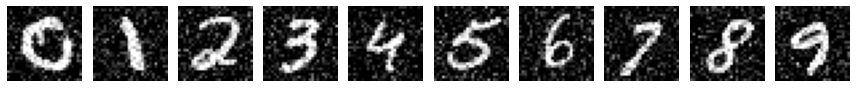

In [11]:
from scipy.io import loadmat

dMNIST = loadmat('NoisyMNIST.mat')
mX     = dMNIST['mX']
vY     = dMNIST['vY'].squeeze()

vIdx = [np.where(vY == ii)[0][0] for ii in range(10)]

_, vAxes = plt.subplots(1, 10, figsize=(12, 4))
for ii, ax in enumerate(vAxes):
    idx = vIdx[ii]
    mI  = np.reshape(mX[:,idx], (28, 28))
    mI  = np.clip   (mI, 0, 1)

    ax.imshow(mI, cmap='gray')
    ax.axis  ('off')
    
plt.tight_layout()
plt.show        ()
         

The goal here is to use PCA in order to apply (a simple) image denoising
### 2.11
* Plot the spectrum, i.e. the eigenvalues of the covariance matrix.
* Use the plot to set some $d<D$ ($d$ should be set after the "elbow").
* Apply PCA from $D$ to $d$ and back to $D$ (encode-decode).
* Plot the reconstructed data.
* Play with different values of $d$.  
Explain the trade-off between setting small values of $d$ and large values of $d$.

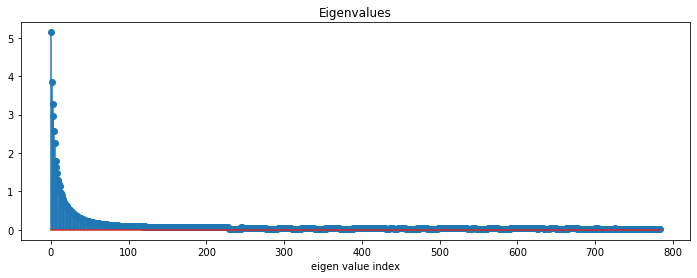

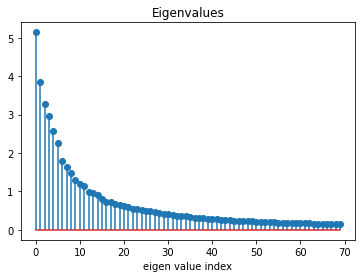

In [12]:
####################################################
##--Your code here...
d = 70
cov = np.cov(mX)
eigenvalues, eifenvectors = np.linalg.eig(cov)
plt.figure(figsize=(12, 4))
plt.stem  (eigenvalues,use_line_collection=True)
plt.title ('Eigenvalues')
plt.xlabel('eigen value index')
plt.show  ()
plt.stem  (eigenvalues[:d],use_line_collection=True)
plt.title ('Eigenvalues')
plt.xlabel('eigen value index')
plt.show  ()

####################################################

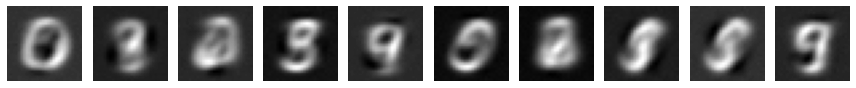

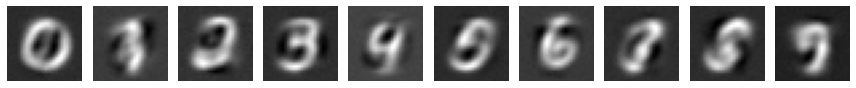

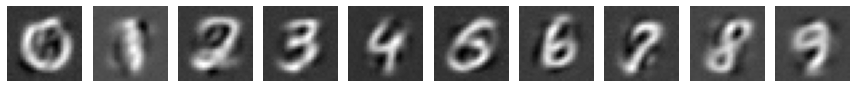

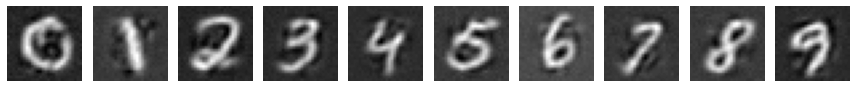

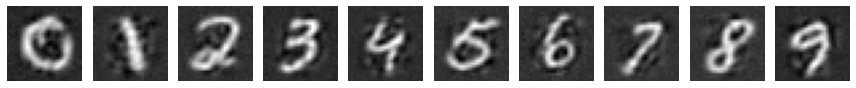

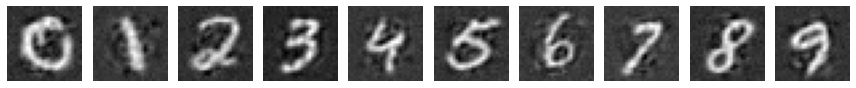

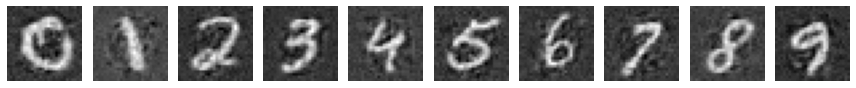

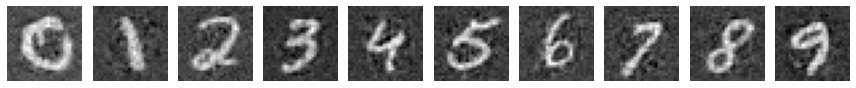

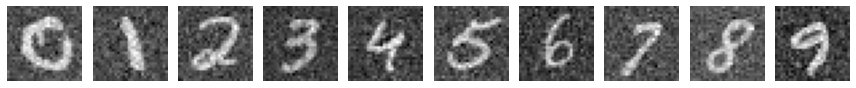

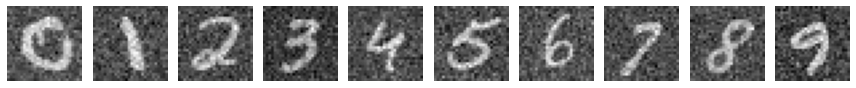

In [13]:
def numbers_pca_encode_decode(X, d, num_of_images_to_plot = 10):
    oPCA = PCA(d)
    oPCA.Fit(X)
    mZ = oPCA.Encode(X)
    mHatX = oPCA.Decode(mZ)
    _, vAxes = plt.subplots(1, num_of_images_to_plot, figsize=(12, 4))
    
    for ii, ax in enumerate(vAxes):
        idx = vIdx[ii]
        mI  = mHatX[:,idx].reshape((28, 28))
        ax.imshow(mI, cmap='gray')
        ax.axis  ('off')

    plt.tight_layout()
    plt.show()
    



numbers_pca_encode_decode(mX, 5)
numbers_pca_encode_decode(mX, 10)
numbers_pca_encode_decode(mX, 25)
numbers_pca_encode_decode(mX, 50)
numbers_pca_encode_decode(mX, 75)
numbers_pca_encode_decode(mX, 100)
numbers_pca_encode_decode(mX, 150)
numbers_pca_encode_decode(mX, 200)
numbers_pca_encode_decode(mX, 400)
numbers_pca_encode_decode(mX, 600)




when d is large we get smaller dimensions but we lose more information so the reconstruction looks less good.
when d is lage we keep more information which make our dataset to be with more dimentions but we lose less
information and the reconstruction is better.

### 2.12
Use the labels `vY` to improve your results (that is, cleaner images).  
(Be creative...)

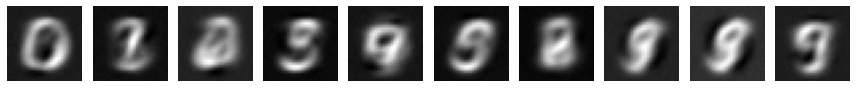

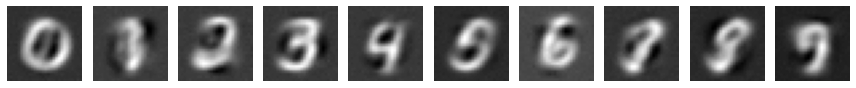

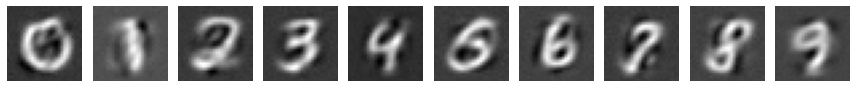

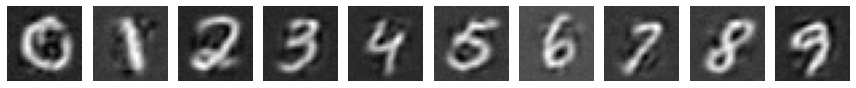

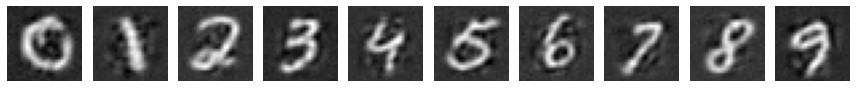

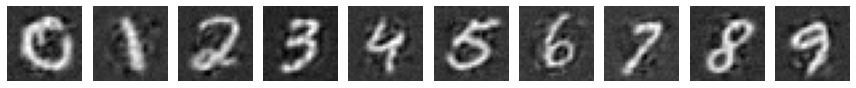

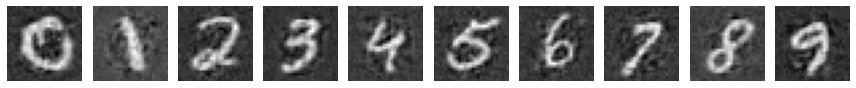

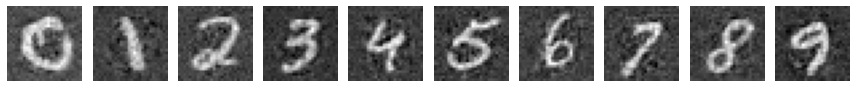

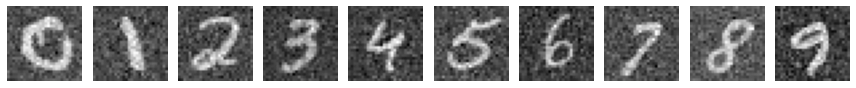

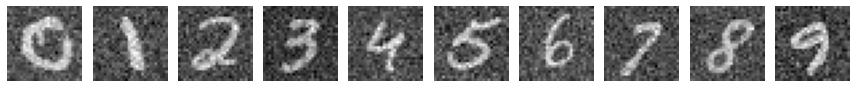

In [14]:
####################################################
##--Your code here...

def numbers_pca_encode_decode_xy(X, d, num_of_images_to_plot = 10):
    oPCA = PCA(d)
    oPCA.Fit(X)
    mZ = oPCA.Encode(X)
    mHatX = oPCA.Decode(mZ)
    _, vAxes = plt.subplots(1, num_of_images_to_plot, figsize=(12, 4))
    
    for ii, ax in enumerate(vAxes):
        idx = vIdx[ii]
        mI  = mHatX[0:-1,idx].reshape((28, 28))
        ax.imshow(mI, cmap='gray')
        ax.axis  ('off')

    plt.tight_layout()
    plt.show()
    

mx_with_dy = np.concatenate((mX, vY.reshape(1, vY.shape[0])), axis=0)

numbers_pca_encode_decode_xy(mx_with_dy, 5)
numbers_pca_encode_decode_xy(mx_with_dy, 10)
numbers_pca_encode_decode_xy(mx_with_dy, 25)
numbers_pca_encode_decode_xy(mx_with_dy, 50)
numbers_pca_encode_decode_xy(mx_with_dy, 75)
numbers_pca_encode_decode_xy(mx_with_dy, 100)
numbers_pca_encode_decode_xy(mx_with_dy, 150)
numbers_pca_encode_decode_xy(mx_with_dy, 200)
numbers_pca_encode_decode_xy(mx_with_dy, 400)
numbers_pca_encode_decode_xy(mx_with_dy, 600)


####################################################

---
# KPCA
### 3.9 KPCA Implementation
Implement the following `KPCA` class:
* `Fit` - Given $\boldsymbol{X}\in\mathbb{R}^{D\times N}$, obtains the parameters for the `Encode` method.
* `Encode` - Apply (out of sample) encoding.

**Notes:**
* `k` is the kernel function $k:\mathbb{R}^{D}\times\mathbb{R}^{D}\to\mathbb{R}$.
* `k` should support multiple inputs (avoid for loops), namely:
```python
def k(mX1, mX2)
    '''
    Computes the kernel function between two sets of vectors.
    Args:
        mX1 -                       mX1.shape = (D, N1)
        mX2 -                       mX2.shape = (D, N2)
    Output:
        mKx - Output kernel matrix, mKx.shape = (N1, N2)
    '''
```
* Use `scipy.sparse.linalg.eigsh` for efficient decomposition of a real symmetric square matrix.
* Avoid matrix multiplication if not needed (hint: $\tilde{\boldsymbol{X}}=\boldsymbol{X}\boldsymbol{J}$ is slow and inefficient).

In [15]:
from scipy.sparse.linalg import eigsh

class KPCA:
    def __init__(self, d, k):
        self.d = d
        self.k = k
        self.mX = None 
        
    
    def _center_matrix(self, K):
        n_samples = K.shape[0]
        K_fit_rows_ = np.sum(K, axis=0) / n_samples
        K_fit_all_ = K_fit_rows_.sum() / n_samples
        K_pred_cols = (np.sum(K, axis=1) / K_fit_rows_.shape[0])[:, np.newaxis]

        K -= K_fit_rows_
        K -= K_pred_cols
        K += K_fit_all_
        return K
    
    def Fit(self, mX):
        '''
        Learns model's parameters
        Args:
            mX - Input training data, mX.shape = (D, N)
        Output:
            self
        '''
        ####################################################
        ##--Your code here...
        self.mX = mX
        self.Kx = self.k(mX, mX)
        self.Kx_hat = self._center_matrix(np.copy(self.Kx))
        self.vS, self.vT = eigsh(self.Kx_hat, self.d, which='LM')
        indices = self.vS.argsort()[::-1]
        self.vS = self.vS[indices]
        self.vT = self.vT[:, indices]
        self.sigma = np.diag(self.vS)
        
        #################################################### 
        
        return self
    
    def Encode(self, mXstar):
        '''
        Apply (out of sample) encoding
        Args:
            mXstar - Input data,                                  mX.shape = (D, Nstar)
        Output:
            mZ     - Low-dimensional representation (embeddings), mZ.shape = (d, Nstar)
        '''
        ####################################################
        ##--Your code here...
        N = mXstar.shape[1]
        J = np.identity(N) - 1 / N * np.ones((N, N))
        kx = J @ (self.k(self.mX, mXstar) - 1 / N * self.Kx @ np.ones((N, 1)))
        sigma_inv_d = np.linalg.inv(self.sigma)
        return sigma_inv_d @ self.vT.T @ kx
    
        #################################################### 
        

---
### 3.10
For each dataset in `[load_iris, load_wine, load_breast_cancer, load_digits]`:
1. If needed, apply normalization (as in 2.10).
2. Apply KPCA from $D$ to $2$ and obtained the low-dimensional represent $\boldsymbol{Z}\in\mathbb{R}^{2\times N}$ using the following kernels:
    * $k\left(\boldsymbol{x}_{i},\boldsymbol{x}_{j}\right)=\boldsymbol{x}_{i}^{T}\boldsymbol{x}_{j}$, make sure the results match the standard PCA! (and explain why this is the case?)
    * $k\left(\boldsymbol{x}_{i},\boldsymbol{x}_{j}\right)=\left(1+\boldsymbol{x}_{i}^{T}\boldsymbol{x}_{j}\right)^{p}$, set $p$ yourself
    * $k\left(\boldsymbol{x}_{i},\boldsymbol{x}_{j}\right)=\exp\left(-\frac{\left\Vert \boldsymbol{x}_{i}-\boldsymbol{x}_{j}\right\Vert _{2}^{2}}{2\sigma^{2}}\right)$, set $\sigma$ yourself.  
    A reasonable value should be around $\sigma\approx\textrm{median}\left\{ \left\Vert \boldsymbol{x}_{i}-\boldsymbol{x}_{j}\right\Vert _{2}\right\} $
4. Make a scatter plot of $\boldsymbol{Z}\in\mathbb{R}^{2\times N}$ and color the data-points according to `vY`.

### although I got that Digits', Iris need to be standatised
### I got better results when I didnt standartise them.


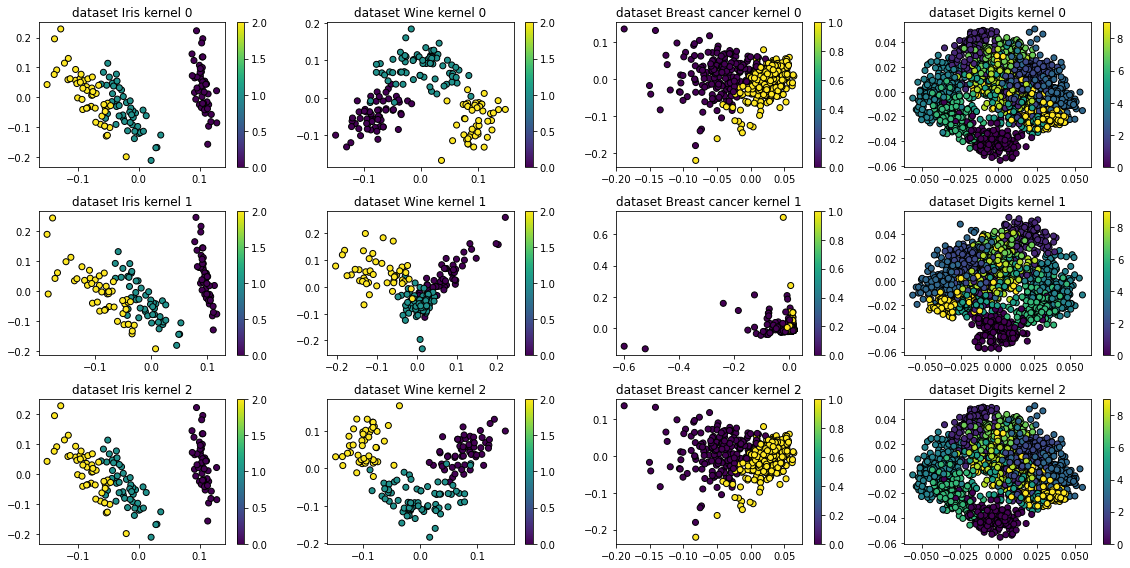

In [16]:
####################################################
##--Your code here...


def kernel_3(x1, x2):
    distance = cdist(x1.T, x2.T)
    return np.exp(-1 * distance ** 2 / 2 * 0.0009 ** 2)


kernels = [lambda x1, x2: x1.T @ x2 , lambda x1, x2: (1 + x1.T @ x2) ** 2, kernel_3]

cols = len(lName)
rows = len(kernels)



fig, axes = plt.subplots(rows, cols, figsize=(16, 8))

for idx, kernel in enumerate(kernels):
    for ii in range(cols):
        mX, vY = lLoad[ii](return_X_y=True)
        
        if lName[ii] not in datasets_to_skip_standartisation:
            mX = standartise(mX)
        
        mX = mX.T
        
        kpca = KPCA(2, kernel).Fit(mX)
        mZ = kpca.Encode(mX)

        ax = axes[idx, ii]
        sct = ax.scatter(*mZ, c=vY, edgecolor='k')
        ax.set_title("dataset {} kernel {}".format(lName[ii], idx))
        plt.colorbar(sct, ax=ax)

plt.tight_layout()
plt.show()

####################################################